Enter the country name for evaluation:  vietnam


         Actual     Predicted
0    786.000000    786.000000
1  12860.571429  12860.571429
2    829.714286    829.714286
3    939.000000    939.000000
4    786.000000    786.000000


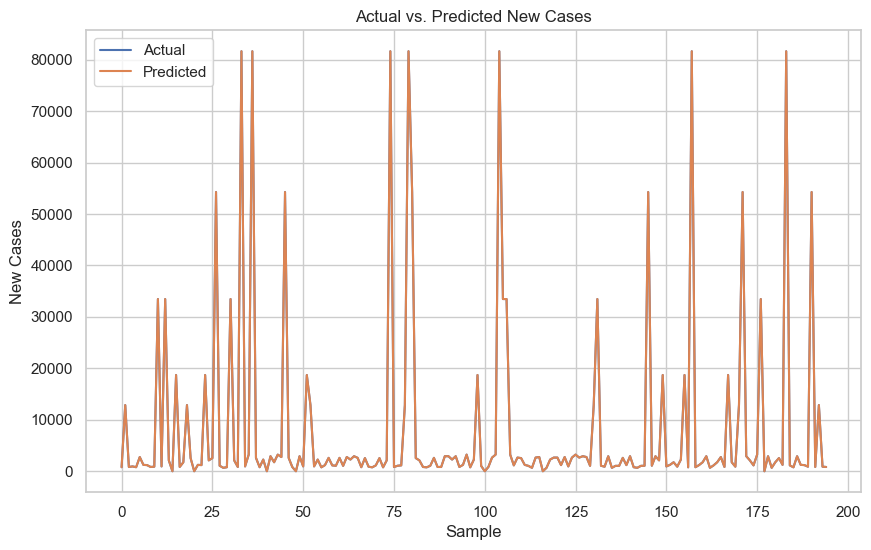

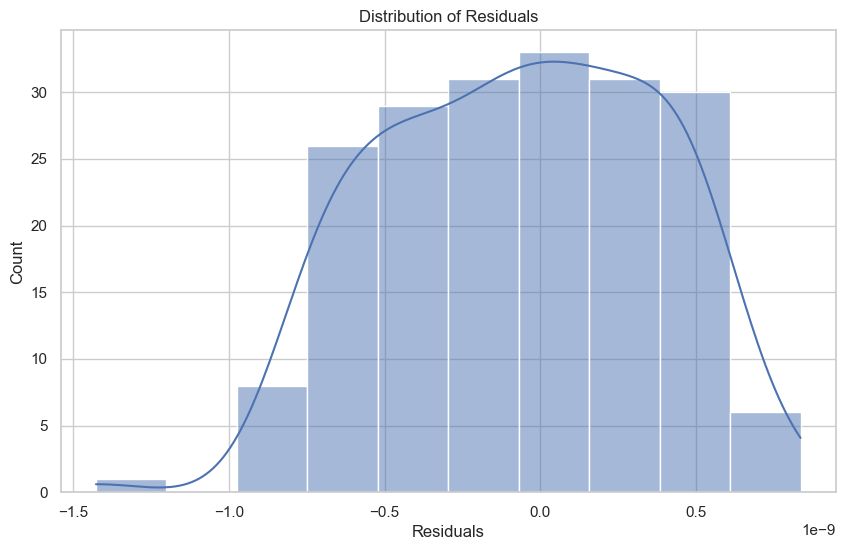

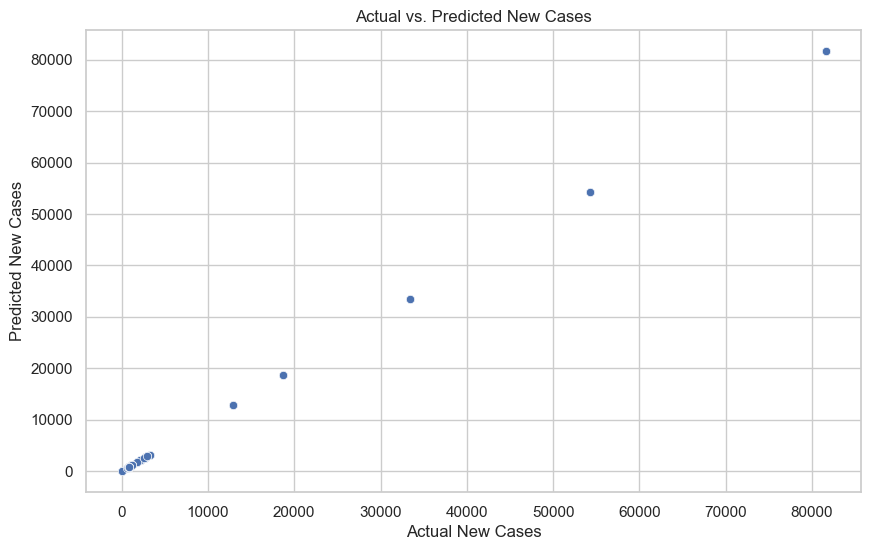

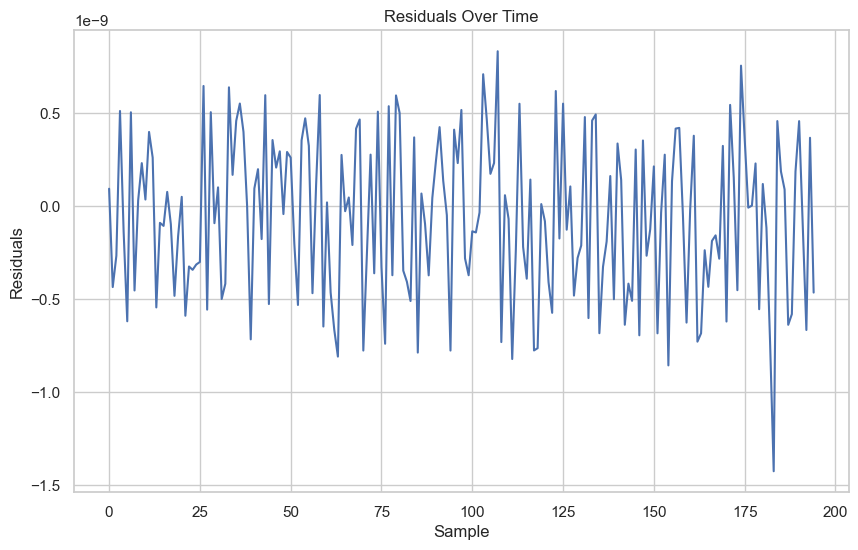

Mean Squared Error (MSE): 1.8895999002662327e-19
R-squared (R2): 1.0
count    1.950000e+02
mean    -6.545039e-11
std      4.308459e-10
min     -1.426088e-09
25%     -4.167191e-10
50%     -4.547474e-11
75%      2.852403e-10
max      8.344614e-10
Name: Residuals, dtype: float64
Notebook saved as ../notebooks/interpret_predictions_vietnam_20240704_171217.ipynb


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os

# Set seaborn style
sns.set(style="whitegrid")

# Prompt user for the country name
country_name = input("Enter the country name for evaluation: ")
country_name_lower = country_name.lower()

# Load the prediction results
predictions_file = f'../data/processed/{country_name_lower}_predictions.csv'
if not os.path.exists(predictions_file):
    print(f"Predictions file for {country_name} does not exist.")
else:
    predictions = pd.read_csv(predictions_file)

    # Display the first few rows of the predictions
    print(predictions.head())

    # Plot the actual vs. predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(predictions['Actual'], label='Actual')
    plt.plot(predictions['Predicted'], label='Predicted')
    plt.xlabel('Sample')
    plt.ylabel('New Cases')
    plt.title('Actual vs. Predicted New Cases')
    plt.legend()
    plt.show()

    # Calculate residuals
    predictions['Residuals'] = predictions['Actual'] - predictions['Predicted']

    # Plot the residuals
    plt.figure(figsize=(10, 6))
    sns.histplot(predictions['Residuals'], kde=True)
    plt.xlabel('Residuals')
    plt.title('Distribution of Residuals')
    plt.show()

    # Scatter plot of actual vs. predicted values
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Actual', y='Predicted', data=predictions)
    plt.xlabel('Actual New Cases')
    plt.ylabel('Predicted New Cases')
    plt.title('Actual vs. Predicted New Cases')
    plt.show()

    # Plot residuals over time
    plt.figure(figsize=(10, 6))
    plt.plot(predictions['Residuals'])
    plt.xlabel('Sample')
    plt.ylabel('Residuals')
    plt.title('Residuals Over Time')
    plt.show()

    # Calculate performance metrics
    mse = ((predictions['Residuals']) ** 2).mean()
    r2 = 1 - (sum((predictions['Actual'] - predictions['Predicted']) ** 2) / sum((predictions['Actual'] - predictions['Actual'].mean()) ** 2))

    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R2): {r2}")

    # Display some statistics about the residuals
    print(predictions['Residuals'].describe())

    # Save the notebook
    now = datetime.datetime.now()
    filename = f"../notebooks/interpret_predictions_{country_name_lower}_{now.strftime('%Y%m%d_%H%M%S')}.ipynb"
    print(f"Notebook saved as {filename}")
